### Визуализация данных

Необходимо провести базовый EDA выбранного набора данных.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [3]:
# Загрузим датасет с данными об уровне счастья в разных странах за 2019 год
happy = pd.read_csv('2019.csv')

<b> Описание датасетa с данными об уровне счастья в разных странах за 2019 год: </b>

- <b>Overall Rank (Общий рейтинг)</b> - Рейтинг страны по шкале счастья;
- <b>Country or region (Страна или регион)</b> - Название страны;
- <b>Score (Оценка)</b> - Показатель, измеренный в 2017 году путем задания выбранным людям вопроса: «Как бы вы оценили свое счастье по шкале от 0 до 10, где 10 - самое счастливое»;
- <b>GDP per Capita (ВВП на душу населения)</b> - Степень вклада ВВП в расчет показателя счастья;
- <b>Social support (Социальная поддержка)</b>
- <b>Health Life Expectancy (Ожидаемая продолжительность здоровой жизни)</b> - Степень влияния ожидаемой продолжительности жизни на расчет показателя счастья; 
- <b>Freedom to make life choices (Свобода делать жизненный выбор)</b> - Степень, в которой свобода способствовала расчету показателя счастья;
- <b>Generosity (Щедрость)</b> - Степень, в которой щедрость способствовала расчету показателя счастья.
- <b>Perceptions of corruption (Восприятие коррупции)</b> - Степень, в которой восприятие коррупции влияет на показатель счастья.

In [4]:
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
# Посмотрим информацию о датафрейме
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


<b> Посмотрим на наш датафрейм: <b>

In [6]:
# Посмотрим информацию о датафрейме
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [7]:
happy.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [8]:
len(happy['Country or region'].unique())

156

<b>Вывод:</b> Предобработка датафрейма не требуется, т.к. пропуски в данных отсутствуют.
Столбец с названиями стран содержит уникальные значения, поэтому мы можем сделать данный столбец индексом

### 1. Посмотрим на степень вклада уровня ВВП в расчет показателя счастья

Text(0, 0.5, 'ВВП на душу населения')

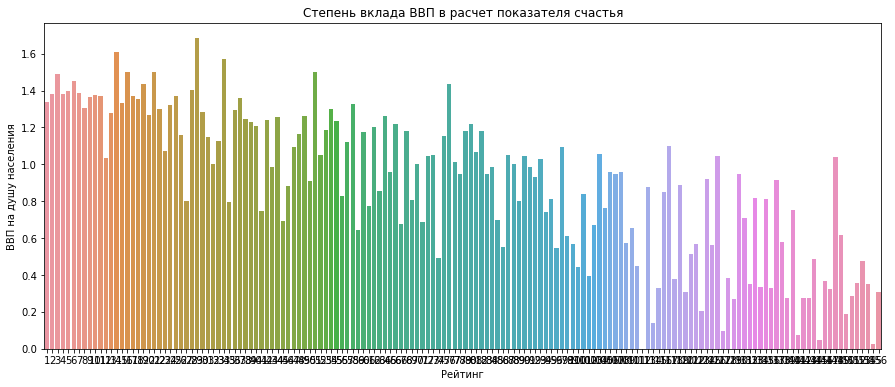

In [9]:
sns.barplot(data=happy, x='Overall rank', y='GDP per capita')
plt.title('Степень вклада ВВП в расчет показателя счастья')
plt.xlabel('Рейтинг')
plt.ylabel('ВВП на душу населения')

Зависимость уровня счаться от уровня ВВП есть, но она неявная. Более богатые страны в большинстве случаев имеют более высокий рейтинг.
Но повышение уровня ВВП не делает людей счастливее.

### 2. Посмотрим влияние оценки счастья на общий рейтинг

Text(0, 0.5, 'Оценка уровня счастья людьми')

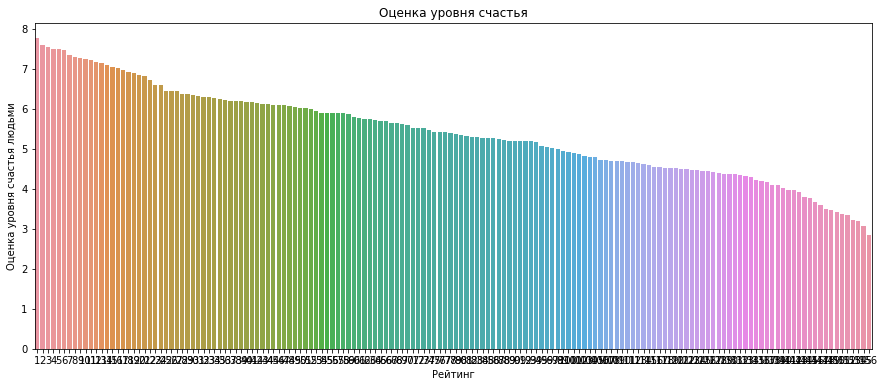

In [10]:
sns.barplot(data=happy, x='Overall rank', y='Score')
plt.title('Оценка уровня счастья')
plt.xlabel('Рейтинг')
plt.ylabel('Оценка уровня счастья людьми')

Наблюдаем зависимость оценок людей на положение страны в рейтинге.
С уменьшением позиции в рейтинге также снижается оценка уровня счастья. 

### 3. Посмотрим насколько показатели коррелированы между собой

In [11]:
# Для удобства визуализации сделаем название страны индексом
happy_ind = happy.set_index('Country or region')

Text(0.5, 1.0, 'Корреляционная зависимость')

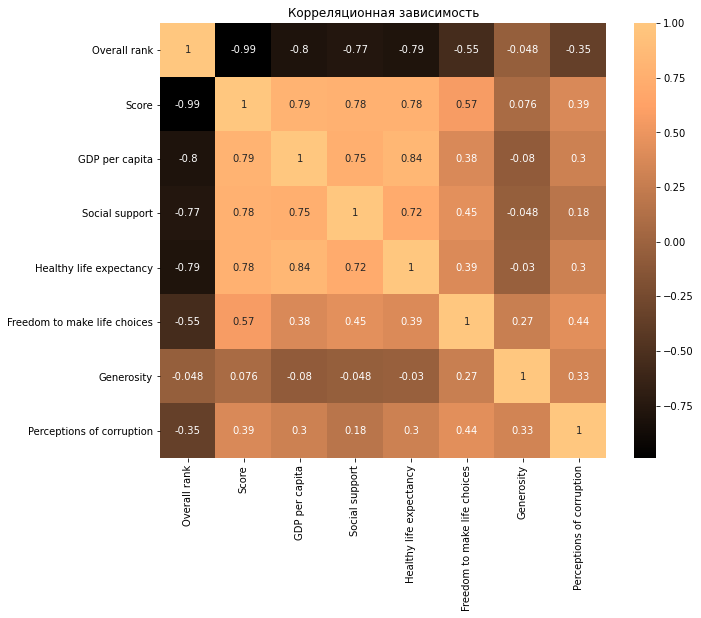

In [12]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(happy_ind.corr(), cmap='copper', annot=True)
plt.title('Корреляционная зависимость')

Показатели Overall rank и Score имеют сильную обратную корреляцию. Зависимость данных показателей мы наблюдаем также на предыдущем графике. На показатель Overall rank не оказывают влияние Generosity и Perceptions of corruption, т.к. они имеют слабую корреляцию с Overall rank.

Также мы наблюдаем, что показатели Generosity и Perceptions of corruption имеют слабую корреляуию и с оставльными показателями. Особого влияния они не оказывают.


### 4. Построим pairplot

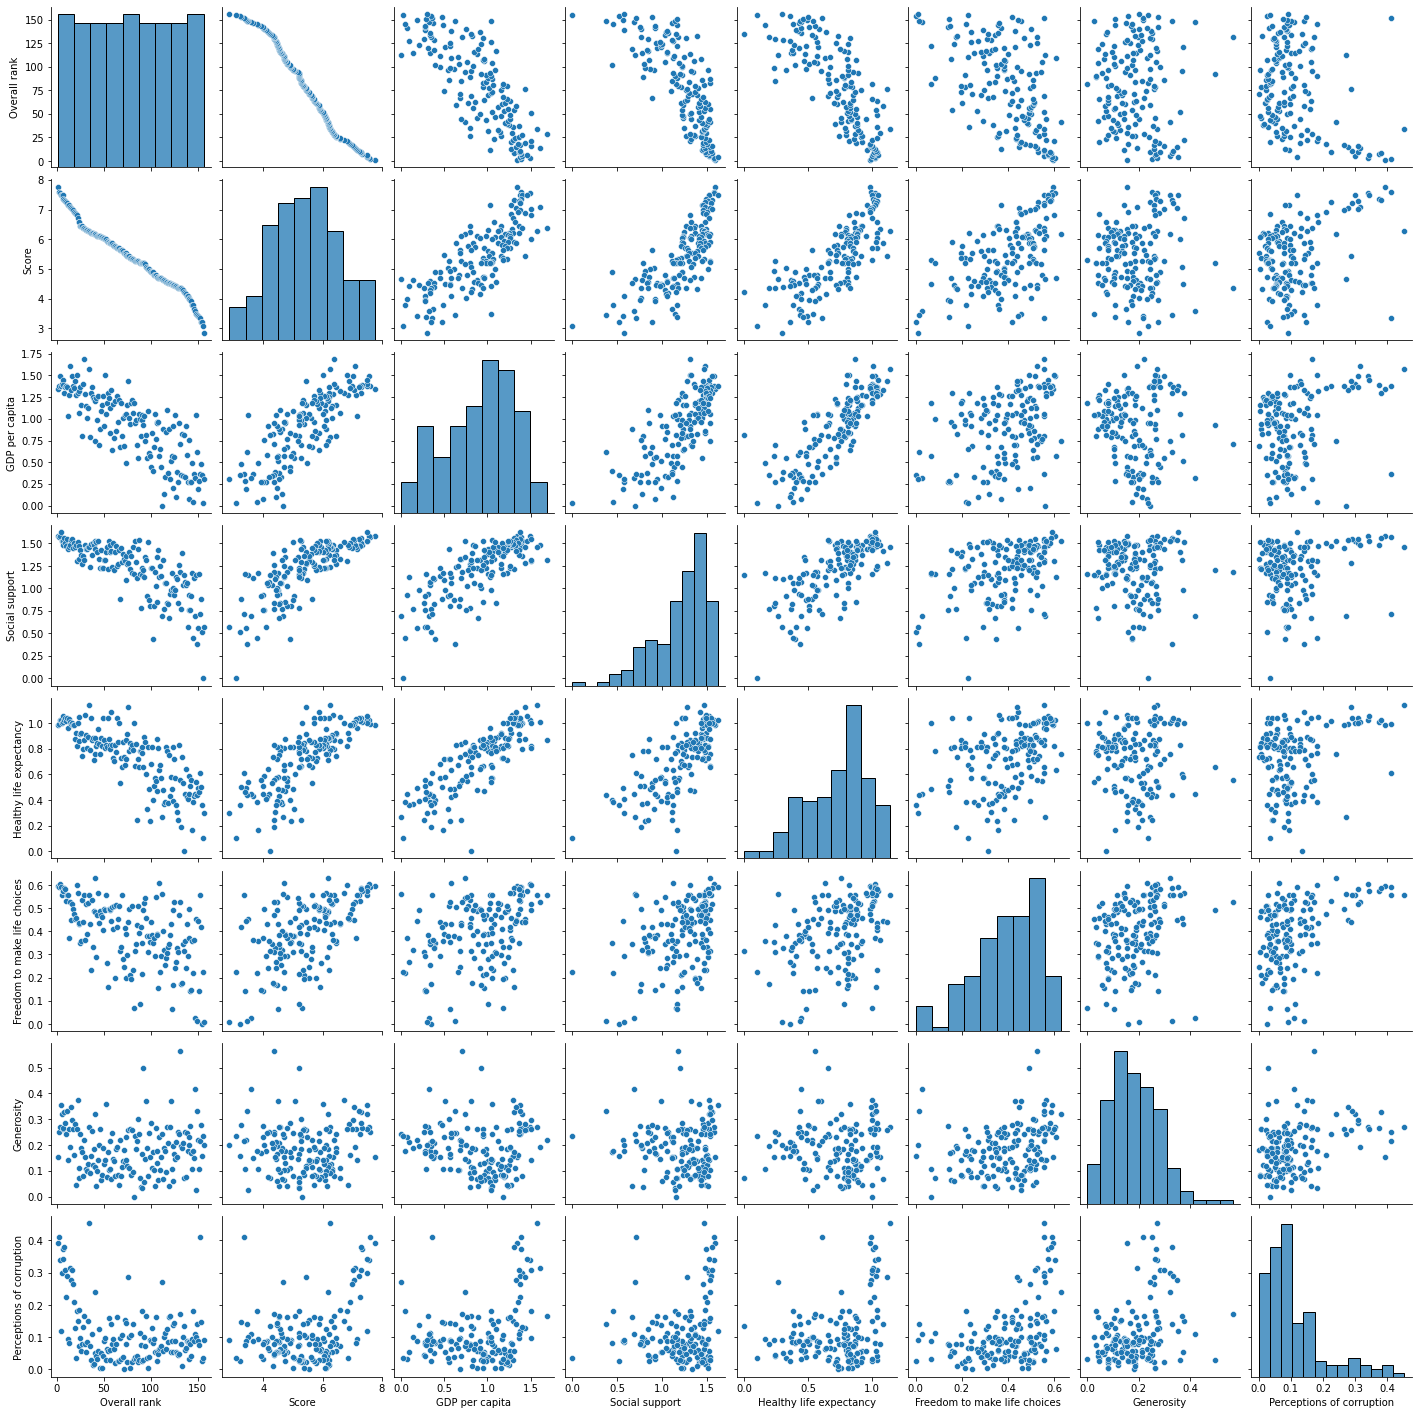

In [13]:
sns.pairplot(happy_ind)

Наблюдаем явную линейную зависисмотсь между показателями Overall rank и Score.

Также видим, что есть зависимости близкие к линейным между показателями: Overall rank и GPD per capita, Score и GPD per capita, Social support и GPD per capita, Healthy life expectancy и GPD per capita, Healthy life expectancy и Overall rank. 